# Discourse analysis
We use the discourse markers from connectives_discourse_markers_PDTB.txt for the discourse analysis.
First, we calculate the number of individual discourse markers per essay (see Figure: Number of discourse markers of essays). After we could not find any difference between the student essays and the ChatGPT essays in terms of the number of discourse markers, we compare the individual discourse markers (see Figure: Number of individual discourse markers of essays). For some discourse markers, such as reason, we can see larger differences, up to one more on average per essay.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import config
from scipy.interpolate import make_interp_spline

plt.rcParams["figure.figsize"] = (config.fig_x, config.fig_y)

path = config.system_path

essays = pd.read_csv(path + "preprocessed_data.csv", sep=";", encoding="UTF-8")
discourse = pd.read_csv(path + "data\\connectives_discourse_markers_PDTB.txt", sep="\'", encoding="UTF-8", header=None, usecols = [1,3])

discourse[3] = discourse[3].apply(lambda x: x.replace("t_conn_", ""))
discourse.sort_values(3, inplace=True, ascending=False)

def plot_smooth(x, y, label, color):
    X_Y_Spline = make_interp_spline(x, y)
    X_ = np.linspace(x.min(), x.max(), 500)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = label, color = color)

# Counting the numbers of discourse markers
def count_discourse_markers(text):
    i = 0
    for marker in discourse.itertuples():
        if marker[1] in text:
            i += text.count(marker[1])
    return i

essays["Student discourse"] = essays["Student Essay"].apply(lambda x: count_discourse_markers(x))
essays["ChatGPT 0.2 discourse"] = essays["ChatGPT Essay 0.2"].apply(lambda x: count_discourse_markers(x))
essays["ChatGPT 0.9 discourse"] = essays["ChatGPT Essay 0.9"].apply(lambda x: count_discourse_markers(x))

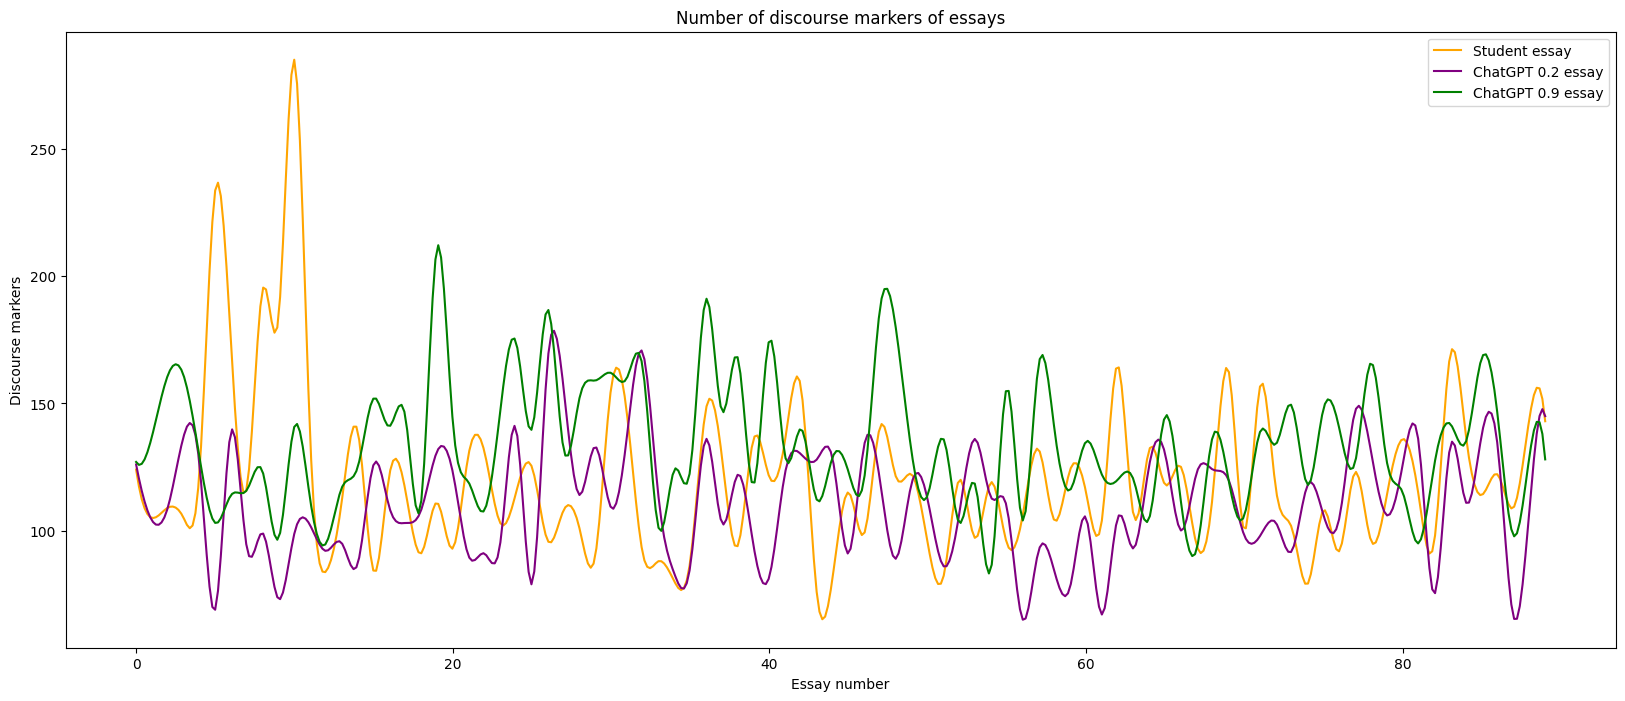

In [2]:

plot_smooth(essays["Unnamed: 0"], essays["Student discourse"], "Student essay", "orange")
plot_smooth(essays["Unnamed: 0"], essays["ChatGPT 0.2 discourse"], "ChatGPT 0.2 essay", "purple")
plot_smooth(essays["Unnamed: 0"], essays["ChatGPT 0.9 discourse"], "ChatGPT 0.9 essay", "green")
plt.xlabel("Essay number")
plt.ylabel("Discourse markers")
plt.title("Number of discourse markers of essays")
plt.legend()
plt.show()

In [3]:
all_modals = []
for marker in discourse.itertuples():
    if not any(marker[2] in modal for modal in all_modals):
        all_modals.append(marker[2])

# Identifies the number of of individual discourse markers
def identify_discourse_markers(text):
    temp = []
    for marker in discourse.itertuples():
        if marker[1] in text:
            temp.append(marker[2])
    result = []
    for i in range(len(all_modals)):
        result.append(temp.count(all_modals[i]))
    return result

# Calcualtes the sum of lists in lists: [1,4]+[1,3] = [2,7]
def calculate_sum(label):
    extracted_essays = essays[label].apply(lambda x: identify_discourse_markers(x))
    res = list()
    for j in range(0, len(extracted_essays[0])):
        tmp = 0
        for i in range(0, len(extracted_essays)):
            tmp = tmp + extracted_essays[i][j]
        res.append(tmp)
    for x in range(0, len(res)):
        res[x] = np.divide(res[x],len(extracted_essays))
    return res    

# Removing the _ from the modals and plotting the graph
def plot_modals(x, y, label, color):
    y_ = []
    for i in range(len(y)):
        y_.append(y[i].replace('_', ' '))
    plt.scatter(x, y_, label = label, color = color, alpha=0.5)

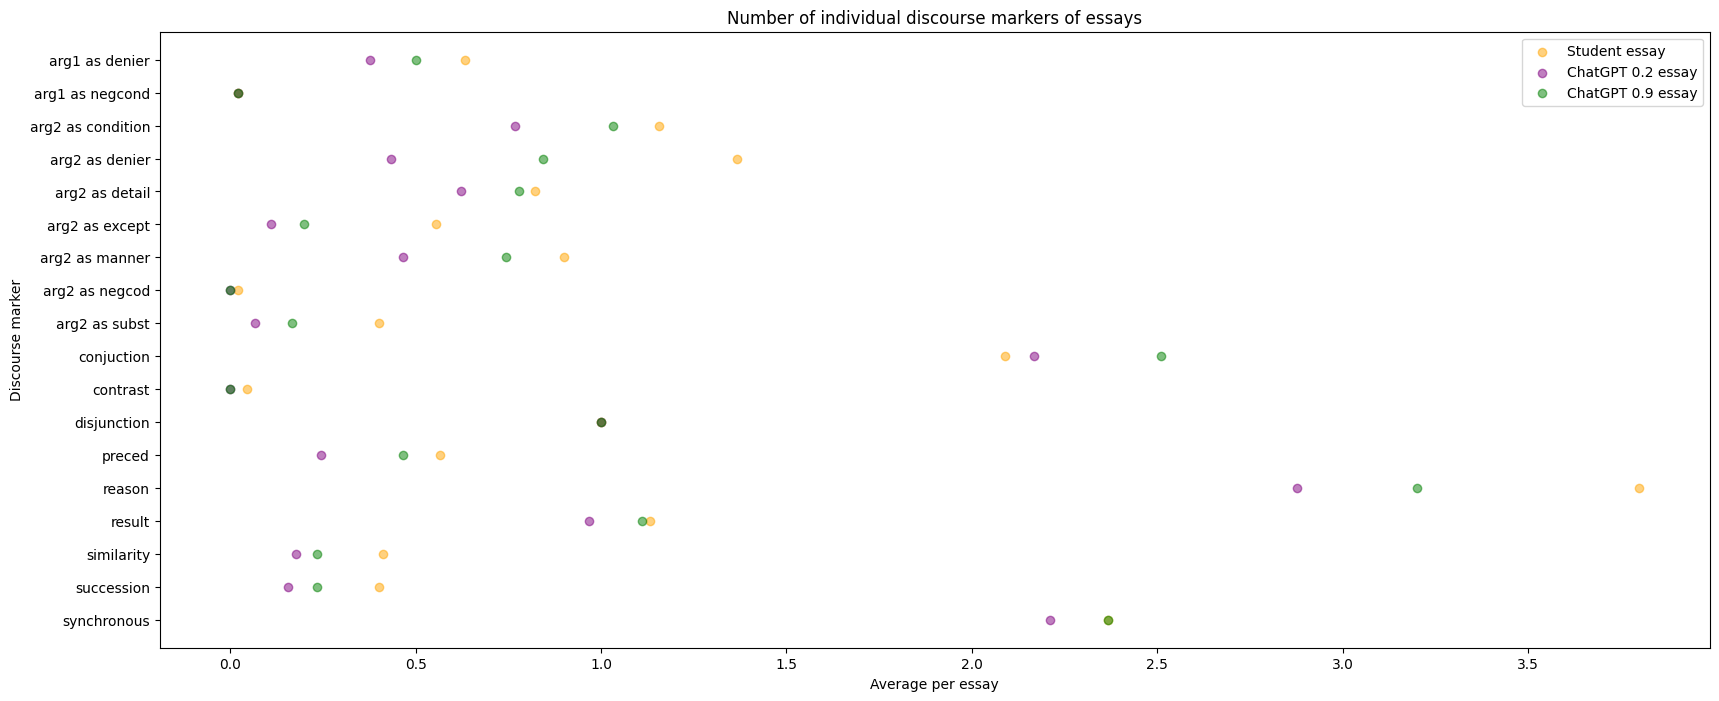

In [4]:
plot_modals(x = calculate_sum("Student Essay"), y = all_modals, label = "Student essay", color = "orange")
plot_modals(x = calculate_sum("ChatGPT Essay 0.2"), y = all_modals, label = "ChatGPT 0.2 essay", color = "purple")
plot_modals(x = calculate_sum("ChatGPT Essay 0.9"), y = all_modals, label = "ChatGPT 0.9 essay", color = "green")
plt.xlabel("Average per essay")
plt.ylabel("Discourse marker")
plt.title("Number of individual discourse markers of essays")
plt.legend()
plt.show()